# Proj07

I certify that this project is my own work and is not the work of others. I agree not to share my solution with others. - Michael Navarro.

# Import required libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
from scipy import fftpack

# Utility functions

In [2]:
# Edited for consistency with the other helper plot functions in regard to the params
# this also means the functino doesn't rely on scope levels to work
def plotSignal(theTimeVec,theData,theLabel):
    fig,ax0 = plt.subplots(1,1,
                            facecolor='0.75',
                            linewidth=3,
                            edgecolor='Black')
    #Create the plot
    ax0.plot(theTimeVec, theData, label=theLabel)

    #Decorate the plot
    ax0.legend(loc='center left',framealpha=0.3,facecolor='Green')
    #ax0.set_ylabel('Amplitude')
    ax0.set_xlabel('Time in seconds')

    ax0.grid(True)
    ax0.xaxis.set_major_locator(ticker.MultipleLocator(20*time_step))
    ax0.xaxis.set_minor_locator(ticker.MultipleLocator(4*time_step))

    ax0.tick_params(axis='both',which='minor',length=5)
    ax0.tick_params(axis='both',which='major',color='black',
                    length=10,labelcolor='blue',width=2)
    
    ax0.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
# end plotSignal()

In [3]:
def plotLogSpectrum(theSampleFreq,theData,theLabel):
    fig,ax0 = plt.subplots(1,1,
                            facecolor='0.75',
                            linewidth=3,
                            edgecolor='Black')
    # Select only the positive frequency values for plotting.
    pos_mask = np.where(theSampleFreq >= 0)
    freqs = theSampleFreq[pos_mask]
    pos_amp = theData[pos_mask]

    #Create the plot
    ax0.plot(freqs, pos_amp, 
             label=theLabel)

    #Decorate the plot
    ax0.legend(loc='center left',framealpha=0.3,facecolor='Green')
    
    if theLabel == 'none':
        ax0.legend_.remove()
    
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Log Amplitude')
    ax0.grid(True)
    freq_interval = theSampleFreq[1]
    ax0.xaxis.set_major_locator(ticker.MultipleLocator(20*freq_interval))
    ax0.xaxis.set_minor_locator(ticker.MultipleLocator(2*freq_interval))

    ax0.tick_params(axis='both',which='minor',length=5)
    ax0.tick_params(axis='both',which='major',color='black',
                    length=10,labelcolor='blue',width=2)
    ax0.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    ax0.set_yscale('log')
# end plotLogSpectrum()

In [4]:
def displayInfo(sample_freq):
    #Print some useful information
    number_freqs = sample_freq.size
    print('Number freqs =',number_freqs)
    freq_interval = sample_freq[1]
    print('Compute a value every ',freq_interval, 'Hz')
    print('Nyquist freq range =',-(freq_interval*number_freqs/2),
          ' to',(freq_interval*number_freqs/2)-freq_interval)
    return freq_interval
# end displayInfo

In [5]:
def plotSpectrum(theSampleFreq,theData,theLabel):
    fig,ax0 = plt.subplots(1,1,
                            facecolor='0.75',
                            linewidth=3,
                            edgecolor='Black')
    # Select only the positive frequency values for plotting.
    pos_mask = np.where(theSampleFreq >= 0)
    freqs = theSampleFreq[pos_mask]
    pos_amp = theData[pos_mask]


    #Create the plot
    ax0.plot(freqs, pos_amp, 
             label=theLabel)

    #Decorate the plot
    ax0.legend(loc='upper left', bbox_to_anchor=(0.08, 0., 1.0, 1.0), framealpha=0.3,facecolor='Green')
    
    if theLabel == 'none':
        ax0.legend_.remove()
    
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude')
    ax0.grid(True)
    freq_interval = theSampleFreq[1]
    ax0.xaxis.set_major_locator(ticker.MultipleLocator(20*freq_interval))
    ax0.xaxis.set_minor_locator(ticker.MultipleLocator(2*freq_interval))

    ax0.tick_params(axis='both',which='minor',length=5)
    ax0.tick_params(axis='both',which='major',color='black',
                    length=10,labelcolor='blue',width=2)
    ax0.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
#end plotSpectrum()

# Spectrum of a square wave

## Create the square wave

In [6]:
freq = 220 # cycles per second (Hz)
period = 1/freq # seconds per sample

# Create 40 samples for each cycle of the square wave
time_step = period/40 #sampling interval
print('time between samples =',time_step, 'seconds')
print('samp rate =',1/time_step, 'samp per second')

# Create a time base sufficient to describe four cycles of the
# square wave with an interval of time_step.
time_vec = np.arange(0, 4*period,time_step)

#Create a square wave sampled at the times in the time base
sig1 = (np.cos(2 * np.pi * time_vec / period)) 
sig2 = (np.cos(2 * np.pi * time_vec * 3 / period))/3 
sig3 = (np.cos(2 * np.pi * time_vec * 5 / period))/5 
sig4 = (np.cos(2 * np.pi * time_vec * 7 / period))/7
sig5 = (np.cos(2 * np.pi * time_vec * 9 / period))/9
sig6 = (np.cos(2 * np.pi * time_vec * 11 / period))/11
sig7 = (np.cos(2 * np.pi * time_vec * 13 / period))/13
sig8 = (np.cos(2 * np.pi * time_vec * 15 / period))/15
sig9 = (np.cos(2 * np.pi * time_vec * 17 / period))/17
sig10 = (np.cos(2 * np.pi * time_vec * 19 / period))/19

sig = sig1-sig2+sig3-sig4+sig5-sig6+sig7-sig8+sig9-sig10

time between samples = 0.00011363636363636364 seconds
samp rate = 8800.0 samp per second


## Plot the square wave

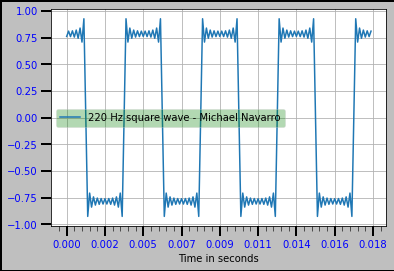

In [7]:
plotSignal(time_vec, sig, '220 Hz square wave - Michael Navarro')

#Save the plot to an output file.
plt.savefig('SquareWave.jpg')

#Display the plot below.
plt.show()

## Compute the amplitude spectrum of the square wave

In [8]:
# Perform FFT on the signal. This produces a complex spectrum.
sig_fft = fftpack.fft(sig)

# Convert the complex spectrum into an amplitude spectrum.
amplitude = np.absolute(sig_fft)

# Get the frequencies at which the amplitude was computed.
sample_freq = fftpack.fftfreq(sig.size,d=time_step)
freq_interval = displayInfo(sample_freq)

Number freqs = 160
Compute a value every  55.0 Hz
Nyquist freq range = -4400.0  to 4345.0


## Plot the log amplitude spectrum

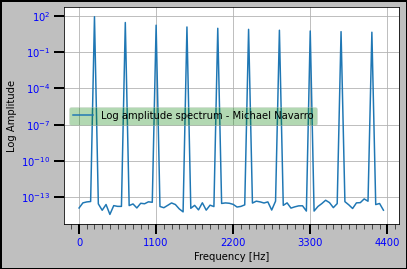

In [9]:
plotLogSpectrum(sample_freq, amplitude, 'Log amplitude spectrum - Michael Navarro')

#Write a copy of the plot to an output file
plt.savefig('LogSpectrum.jpg')

#Display the plot in this notebook
plt.show()


## Plot the linear amplitude spectrum

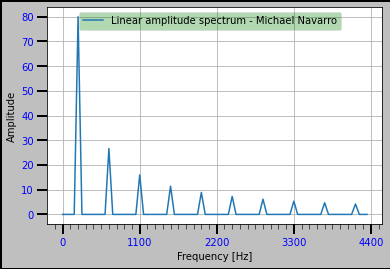

In [10]:
plotSpectrum(sample_freq, amplitude, 'Linear amplitude spectrum - Michael Navarro')

#Write a copy of the plot to an output file
plt.savefig('LinearSpectrum.jpg')

#Display the plot in this notebook
plt.show()

--end--